<a href="https://colab.research.google.com/github/aSafarpoor/storehouse/blob/main/check_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import os

In [ ]:
file_path = "baseline_results_2025-11-07_13-24-53.pkl"
rows = []

with open(file_path, "rb") as file:
    data = pickle.load(file)
for key,val in data.items():
    experiment = key[0]
    dataset = key[1]
    suffix = key[2]
    R = val
    rows.append([experiment,dataset,suffix,R].copy())

file_path = "baseline_results_2025-11-07_13-43-07.pkl"
with open(file_path, "rb") as file:
    data = pickle.load(file)
for key,val in data.items():
    experiment = key[0]
    dataset = key[1]
    suffix = key[2]
    R = val
    rows.append([experiment,dataset,suffix,R].copy())


columns = ['experiment', 'dataset', 'suffix', 'R']
base_df = pd.DataFrame(rows, columns=columns)

In [ ]:
base_df

,experiment,dataset,suffix,R
0,0,facebook,_fj,1
1,1,facebook,_fj,1
2,2,facebook,_fj,1
3,3,facebook,_fj,1
4,4,facebook,_fj,1
...,...,...,...,...
235,5,SBM_100,_extremes,16
236,6,SBM_100,_extremes,18
237,7,SBM_100,_extremes,17
238,8,SBM_100,_extremes,19


In [ ]:
def df_of_our_models(data):
    rows = []
    id = 0
    for key,val in data.items():
        experiment = key[0]
        dataset = key[1]
        suffix = key[2]
        model = key[3]
        if model == 'our':
            for x,y in val.items():
                expansion = x[0]
                seed = x[1]
                EC = y['EC']
                V_S = y['V_S']
                Delta_E = y['Delta_E']
                R = y['R']
                time = y['time']
                LenEC = y['LenEC']
                rows.append([experiment,dataset,suffix,model,expansion,seed,EC,V_S,Delta_E,R,LenEC,time].copy())
                id += 1


    columns = [
        'experiment', 'dataset', 'suffix', 'model',
        'expansion', 'seed', 'EC', 'V_S', 'Delta_E', 'R', 'lenEC', 'time'
    ]
    df = pd.DataFrame(rows, columns=columns)

    return df

def df_of_GAE(data):
    rows = []
    id = 0
    for key,val_total in data.items():

        try:
            y = val_total[0]
        except:
            y = val_total


        experiment = key[0]
        dataset = key[1]
        suffix = key[2]
        model = key[3]
        expansion = -1
        seed = -1
        EC = y['EC']
        V_S = y['V_S']
        Delta_E = y['Delta_E']
        R = y['R']
        time = float(y['time'])
        try:
            LenEC = y['LenEC']

        except:
            LenEC = -1
        rows.append([experiment,dataset,suffix,model,expansion,seed,EC,V_S,Delta_E,R,LenEC,time].copy())
        id += 1


    columns = [
        'experiment', 'dataset', 'suffix', 'model',
        'expansion', 'seed', 'EC', 'V_S', 'Delta_E', 'R', 'lenEC', 'time'
    ]
    df = pd.DataFrame(rows, columns=columns)

    return df



#ABL

In [ ]:
def x_abl(data):
    rows = []
    for x,y in data.items():
        experiment = x[0]
        dataset = x[1]
        suffix = x[2]
        for k,v in y.items():
            expansion = k[0]
            seed = k[1]
            seed_ratio = float(k[2])
            V_S = v['V_S']
            Delta_E = v['Delta_E']
            R = v['R']
            time = float(v['time'])
            if dataset in ['SBM_5','facebook']:
                rows.append([experiment,dataset,suffix,expansion,seed,seed_ratio,V_S,Delta_E,R,time])
    columns = [
        "experiment","dataset","suffix","expansion","seed","seed_ratio","V_S","Delta_E","R","time"
    ]
    df = pd.DataFrame(rows, columns=columns)

    return df

In [ ]:
matching_files_names = [f for f in os.listdir('.')
                 if os.path.isfile(f) and 'Abl' in f]
df = None
for file_name in matching_files_names:
    print(file_name)
    with open(file_name, "rb") as file:
        data = pickle.load(file)

    x = x_abl(data)

    if df is not None:
        df = pd.concat([df, x.copy()], ignore_index=True)
    else:
        df = x.copy()

df = df.drop_duplicates(subset=df.columns)


Abl_study_results_2025-11-09_06-40-37.pkl
Abl_study_results_2025-11-08_18-00-54.pkl
Abl_study_results_2025-11-08_18-00-12.pkl
Abl_study_results_2025-11-09_06-42-46.pkl
Abl_study_results_2025-11-08_18-00-23.pkl


In [ ]:
df.head(5)

,experiment,dataset,suffix,expansion,seed,seed_ratio,V_S,Delta_E,R,time
0,0,SBM_5,_fj,ScoreBasedExpansion,JiHom,0.001,0.024,0.302,1.128,0.31
1,0,SBM_5,_fj,ScoreBasedExpansion,JiHom,0.002,0.028,0.301,1.089,0.62
2,0,SBM_5,_fj,ScoreBasedExpansion,JiHom,0.003,0.028,0.301,1.089,0.95
3,0,SBM_5,_fj,ScoreBasedExpansion,JiHom,0.004,0.028,0.301,1.089,1.29
4,0,SBM_5,_fj,ScoreBasedExpansion,JiHom,0.005,0.028,0.301,1.089,1.63


In [ ]:
def print_unique_values(df, columns):

    for col in columns:
        if col in df.columns:
            print(f"\nColumn: {col}")
            print(df[col].value_counts())
        else:
            print(f"\nColumn '{col}' not found in DataFrame.")


print_unique_values(df,["experiment","dataset","suffix","seed_ratio","expansion","seed"])


grouped = df.groupby(["dataset", "suffix", "expansion", "seed"]).size().reset_index(name='count')
grouped.head(5)


Column: experiment
experiment
0    2093
1    2052
2    2052
3    2052
4    2052
5    2052
6    2052
7    2052
8    2052
9    2052
Name: count, dtype: int64

Column: dataset
dataset
facebook    10282
SBM_5       10279
Name: count, dtype: int64

Column: suffix
suffix
_fj           6854
_filtering    6854
_extremes     6853
Name: count, dtype: int64

Column: seed_ratio
seed_ratio
0.002    1102
0.001    1099
0.003    1080
0.004    1080
0.005    1080
0.006    1080
0.007    1080
0.008    1080
0.009    1080
0.010    1080
0.020    1080
0.030    1080
0.040    1080
0.050    1080
0.060    1080
0.070    1080
0.080    1080
0.090    1080
0.100    1080
Name: count, dtype: int64

Column: expansion
expansion
ScoreBasedExpansion    10283
APPR                   10278
Name: count, dtype: int64

Column: seed
seed
JiHom          2302
Random         2299
Entropy        2280
Hom            2280
EntropyPure    2280
APR            2280
CC             2280
Degree         2280
ABS            2280
Name: count, dt

,dataset,suffix,expansion,seed,count
0,SBM_5,_extremes,APPR,ABS,190
1,SBM_5,_extremes,APPR,APR,190
2,SBM_5,_extremes,APPR,CC,190
3,SBM_5,_extremes,APPR,Degree,190
4,SBM_5,_extremes,APPR,Entropy,190


In [ ]:
grouped = df.groupby(["dataset", "suffix", "seed_ratio", "expansion", "seed"]).agg(
    count=('dataset', 'count'),           # Number of rows per group
    avg_R=('R', 'mean'),                  # Average R
    avg_time=('time', 'mean'),            # Average time
    R_inf_count=('R', lambda x: (x == float('inf')).sum())  # Number of times R is infinity
).reset_index()

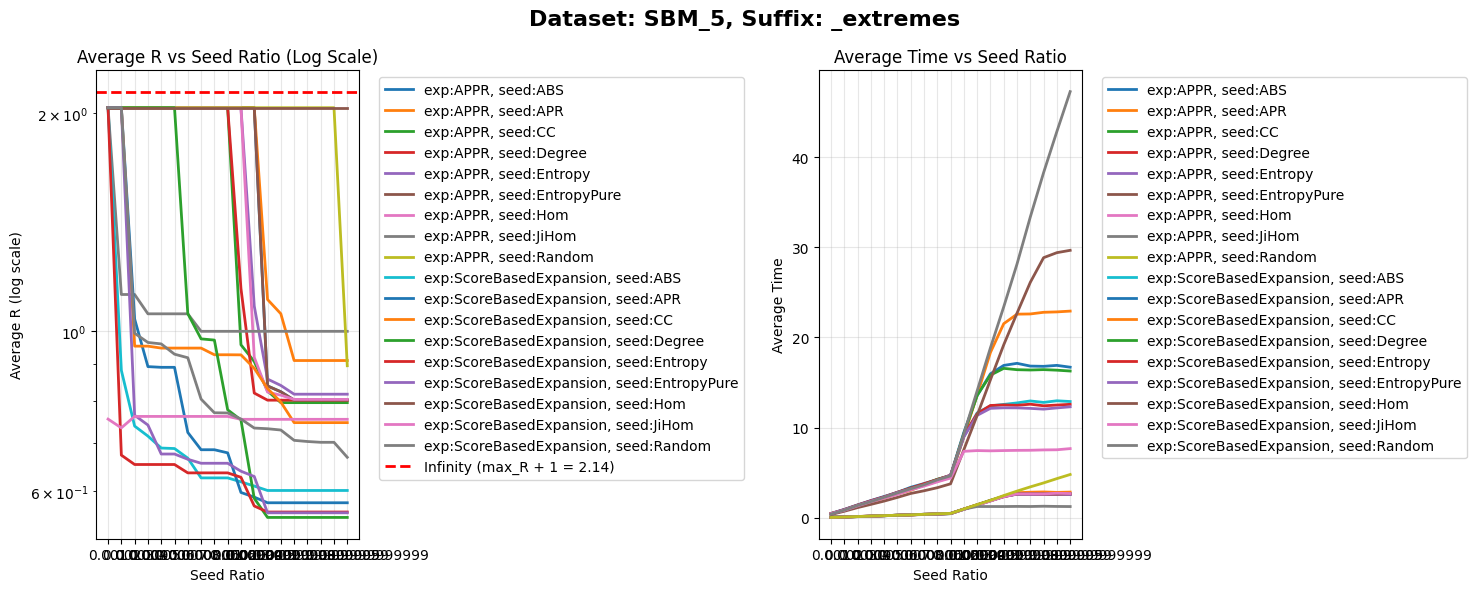

Summary for SBM_5-_extremes:
  - Total groups: 342
  - Groups with infinite R: 132
  - Max finite R: 1.1442
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


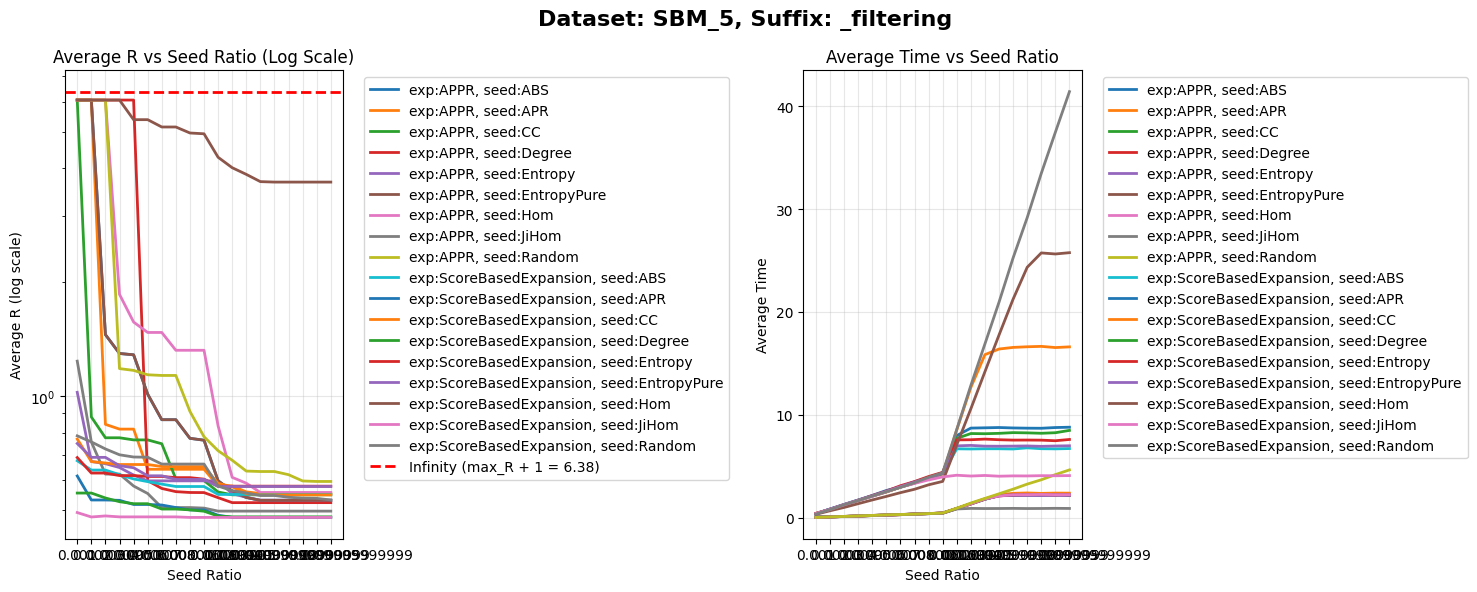

Summary for SBM_5-_filtering:
  - Total groups: 342
  - Groups with infinite R: 22
  - Max finite R: 5.3751
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


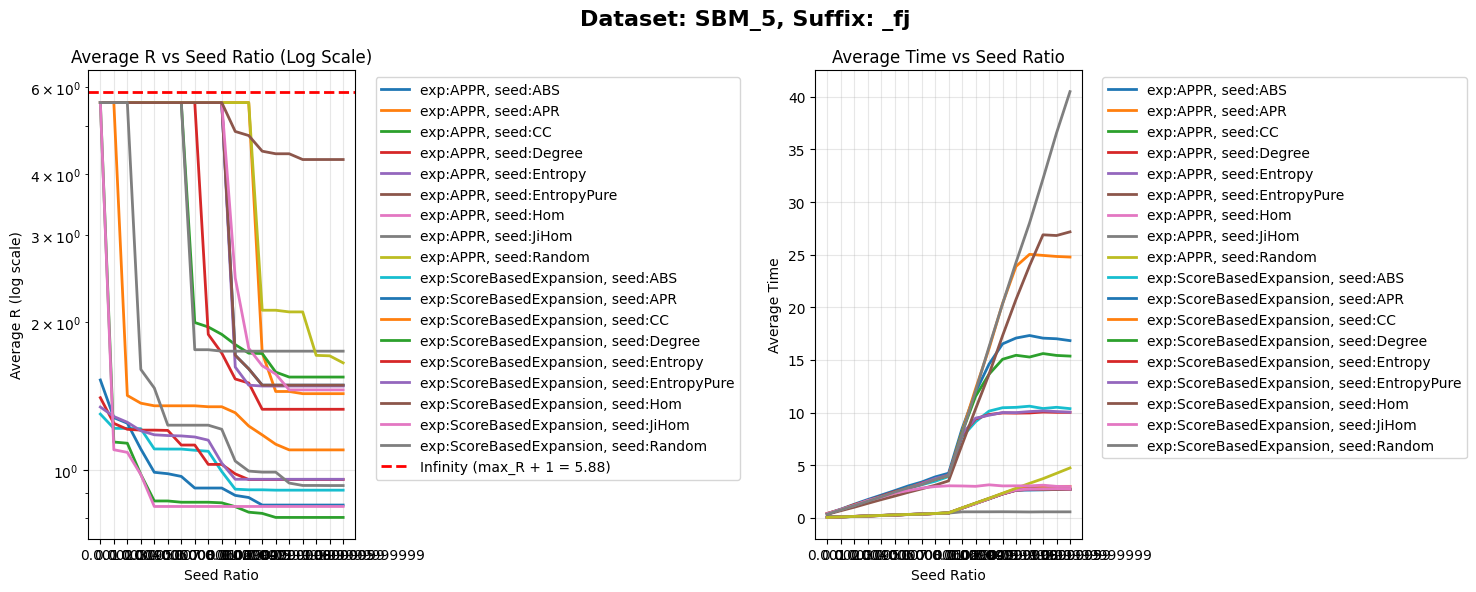

Summary for SBM_5-_fj:
  - Total groups: 342
  - Groups with infinite R: 103
  - Max finite R: 4.8795
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


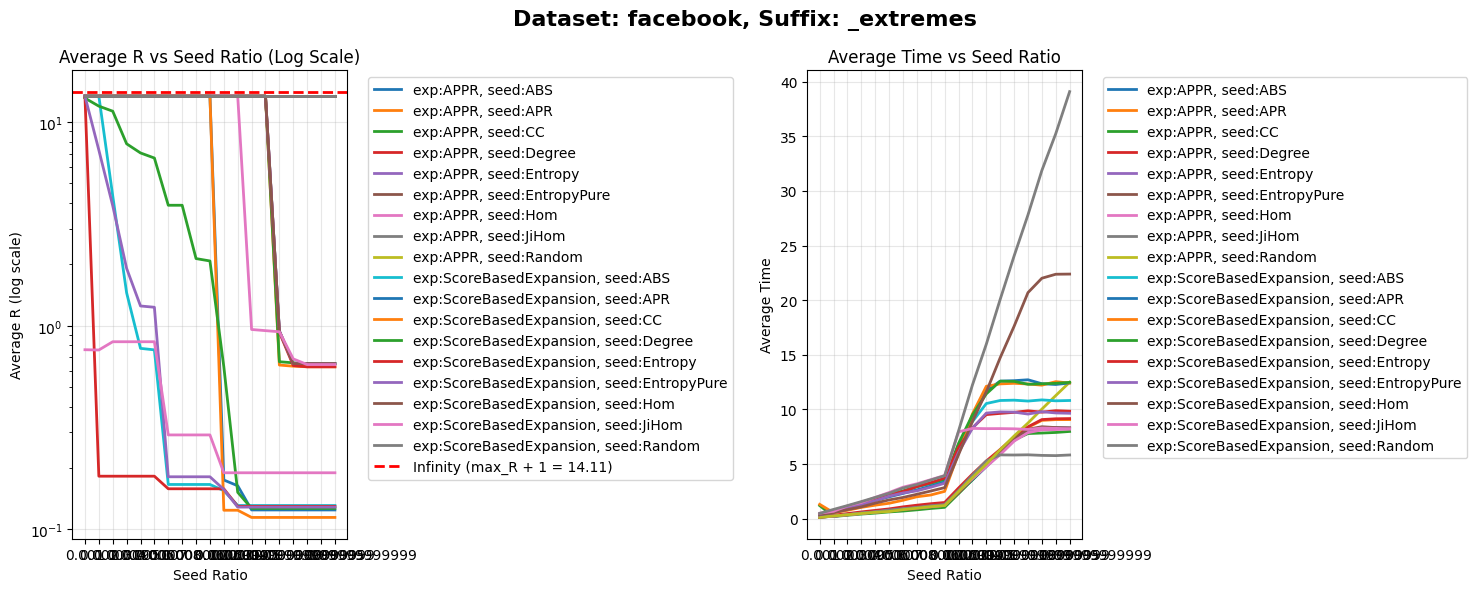

Summary for facebook-_extremes:
  - Total groups: 342
  - Groups with infinite R: 196
  - Max finite R: 13.1083
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


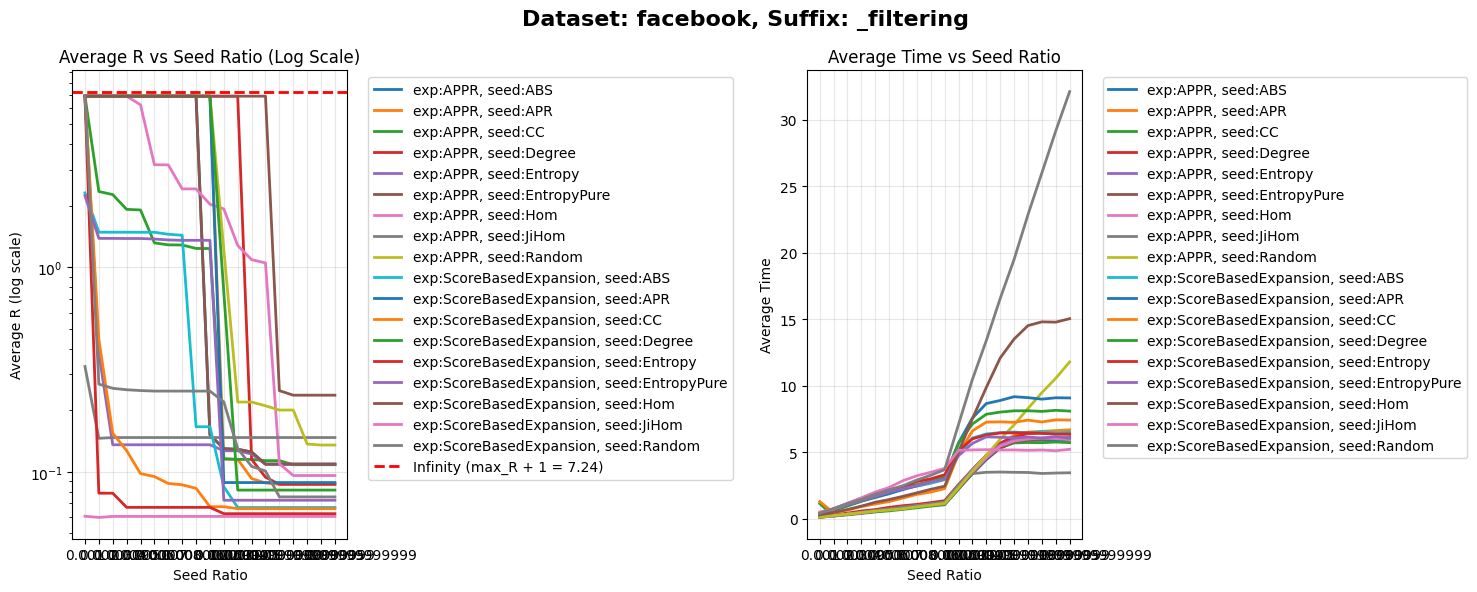

Summary for facebook-_filtering:
  - Total groups: 342
  - Groups with infinite R: 93
  - Max finite R: 6.2379
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


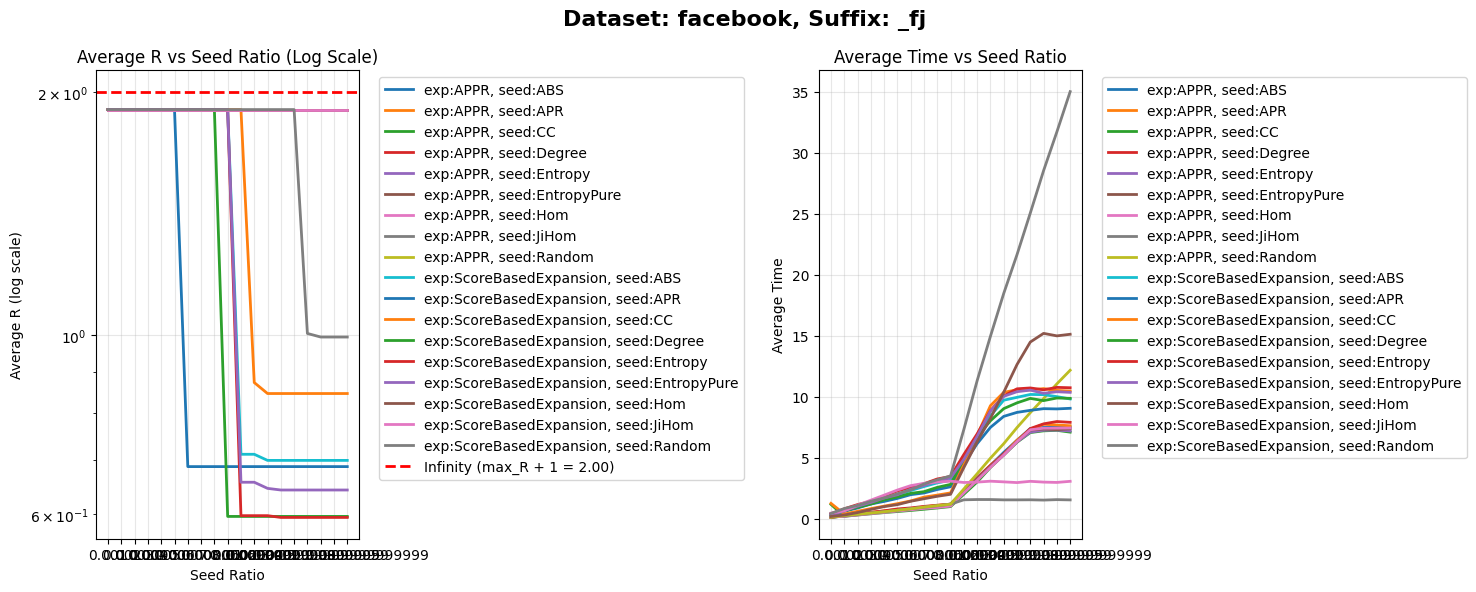

Summary for facebook-_fj:
  - Total groups: 342
  - Groups with infinite R: 280
  - Max finite R: 1.0043
  - Unique seed_ratio values: 19
  - Unique expansion-seed pairs: 18
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique dataset and suffix combinations
combinations = grouped[['dataset', 'suffix']].drop_duplicates()

# For each dataset-suffix combination, create a figure
for _, (dataset, suffix) in combinations.iterrows():
    # Filter data for this combination
    combo_data = grouped[(grouped['dataset'] == dataset) & (grouped['suffix'] == suffix)]

    if combo_data.empty:
        continue

    # Calculate max finite R value for this combination
    finite_R = combo_data[combo_data['avg_R'] != float('inf')]['avg_R']
    if len(finite_R) > 0:
        max_finite_R = finite_R.max()
        inf_line_value = max_finite_R + 1
    else:
        max_finite_R = 1
        inf_line_value = 2

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Dataset: {dataset}, Suffix: {suffix}', fontsize=16, fontweight='bold')

    # Get unique seed_ratio values and create categorical x-axis
    seed_ratios = sorted(combo_data['seed_ratio'].unique())
    x_positions = np.arange(len(seed_ratios))

    # Plot 1: Average R with logarithmic scale
    unique_pairs = combo_data[['expansion', 'seed']].drop_duplicates()

    for _, (expansion, seed) in unique_pairs.iterrows():
        pair_data = combo_data[(combo_data['expansion'] == expansion) &
                              (combo_data['seed'] == seed)].sort_values('seed_ratio')

        if pair_data.empty:
            continue

        # Map seed_ratio to x positions
        x_mapping = {ratio: i for i, ratio in enumerate(seed_ratios)}
        x_values = [x_mapping[ratio] for ratio in pair_data['seed_ratio']]

        # Handle infinite R values
        y_values = []
        for r in pair_data['avg_R']:
            if r == float('inf'):
                y_values.append(inf_line_value * 0.95)  # Just below the red line
            else:
                y_values.append(r)

        line_style = '-' if len(pair_data) > 1 else 'o-'
        ax1.plot(x_values, y_values, line_style,
                label=f'exp:{expansion}, seed:{seed}', markersize=6, linewidth=2)

    # Add red line for infinity
    ax1.axhline(y=inf_line_value, color='red', linestyle='--', linewidth=2,
                label=f'Infinity (max_R + 1 = {inf_line_value:.2f})')

    ax1.set_xlabel('Seed Ratio')
    ax1.set_ylabel('Average R (log scale)')
    ax1.set_title('Average R vs Seed Ratio (Log Scale)')
    ax1.set_yscale('log')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(seed_ratios)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)

    # Plot 2: Average Time with normal scale
    for _, (expansion, seed) in unique_pairs.iterrows():
        pair_data = combo_data[(combo_data['expansion'] == expansion) &
                              (combo_data['seed'] == seed)].sort_values('seed_ratio')

        if pair_data.empty:
            continue

        # Map seed_ratio to x positions
        x_mapping = {ratio: i for i, ratio in enumerate(seed_ratios)}
        x_values = [x_mapping[ratio] for ratio in pair_data['seed_ratio']]
        y_values = pair_data['avg_time']

        line_style = '-' if len(pair_data) > 1 else 'o-'
        ax2.plot(x_values, y_values, line_style,
                label=f'exp:{expansion}, seed:{seed}', markersize=6, linewidth=2)

    ax2.set_xlabel('Seed Ratio')
    ax2.set_ylabel('Average Time')
    ax2.set_title('Average Time vs Seed Ratio')
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(seed_ratios)
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print summary for this combination
    inf_count = len(combo_data[combo_data['avg_R'] == float('inf')])
    print(f"Summary for {dataset}-{suffix}:")
    print(f"  - Total groups: {len(combo_data)}")
    print(f"  - Groups with infinite R: {inf_count}")
    print(f"  - Max finite R: {max_finite_R if len(finite_R) > 0 else 'N/A'}")
    print(f"  - Unique seed_ratio values: {len(seed_ratios)}")
    print(f"  - Unique expansion-seed pairs: {len(unique_pairs)}")
    print("-" * 50)

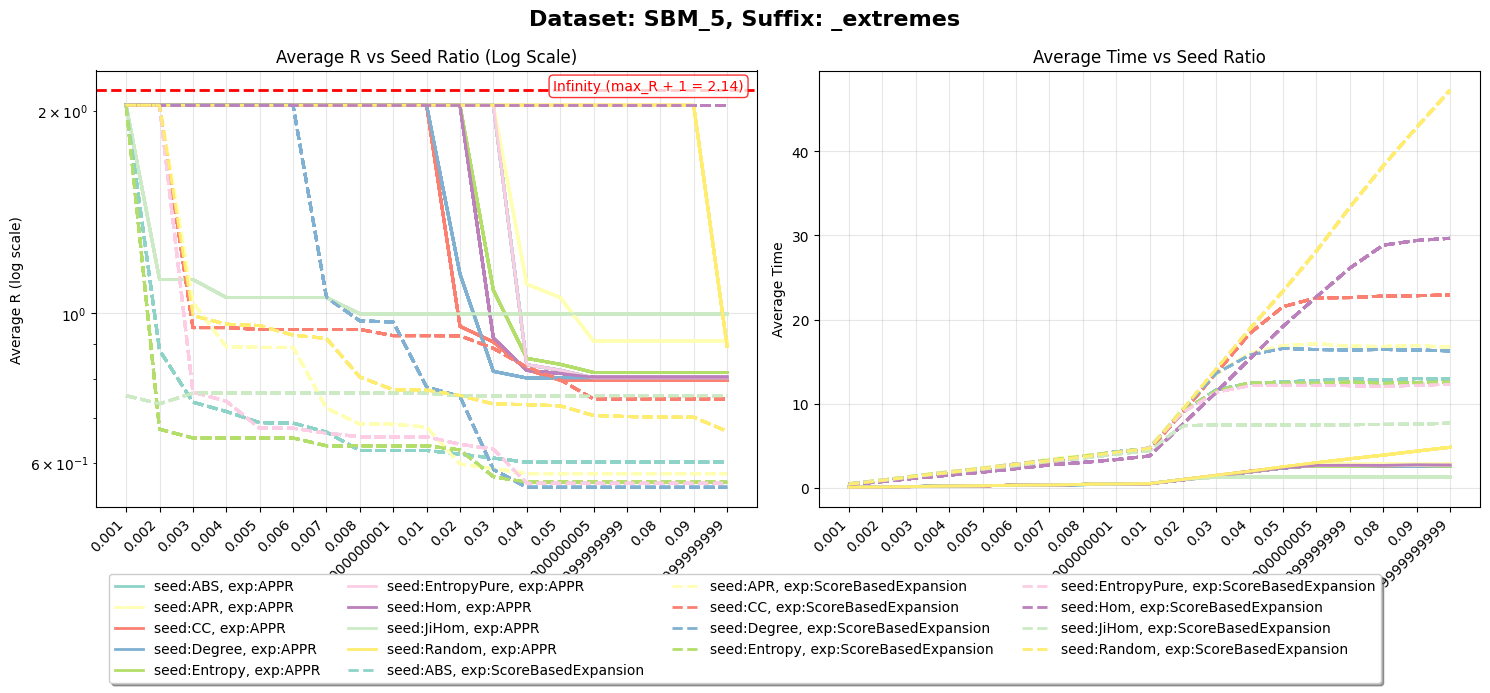

Summary for SBM_5-_extremes:
  - Total groups: 342
  - Groups with infinite R: 132
  - Max finite R: 1.1442
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


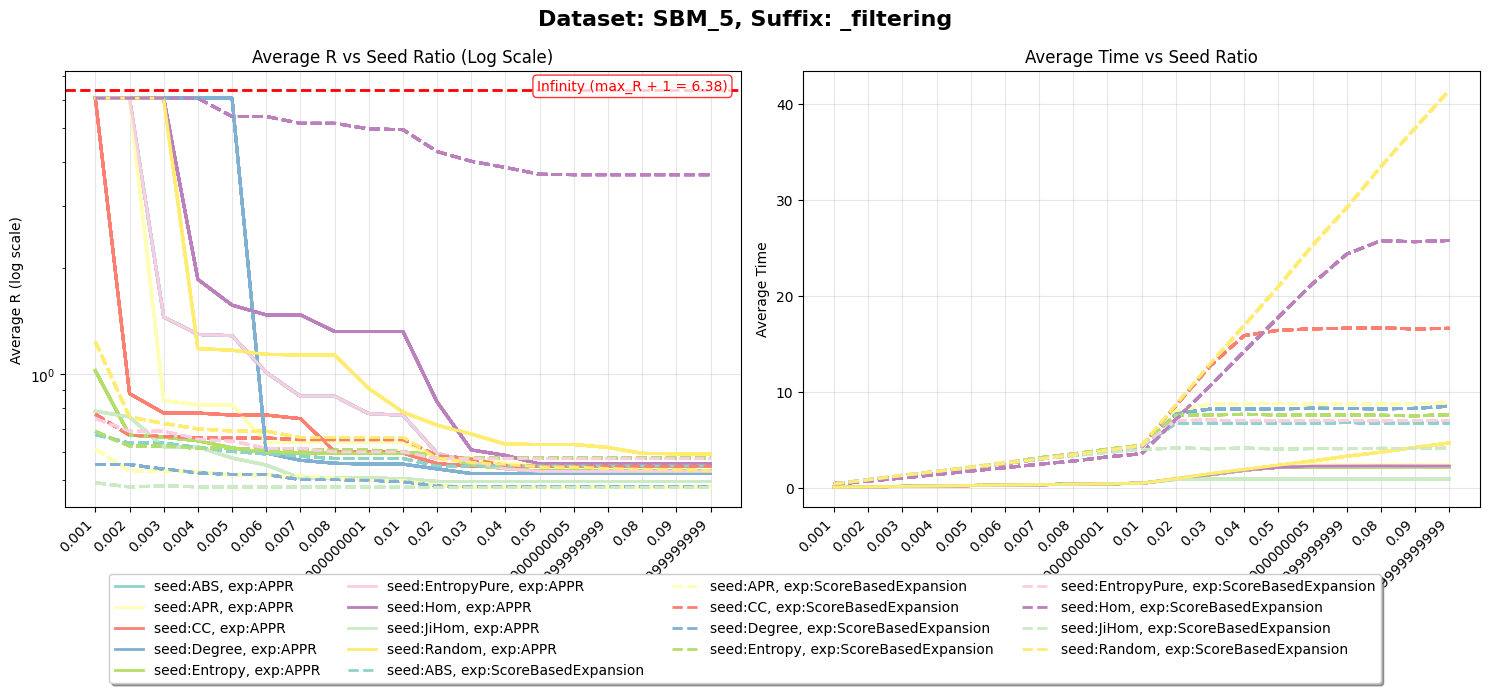

Summary for SBM_5-_filtering:
  - Total groups: 342
  - Groups with infinite R: 22
  - Max finite R: 5.3751
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


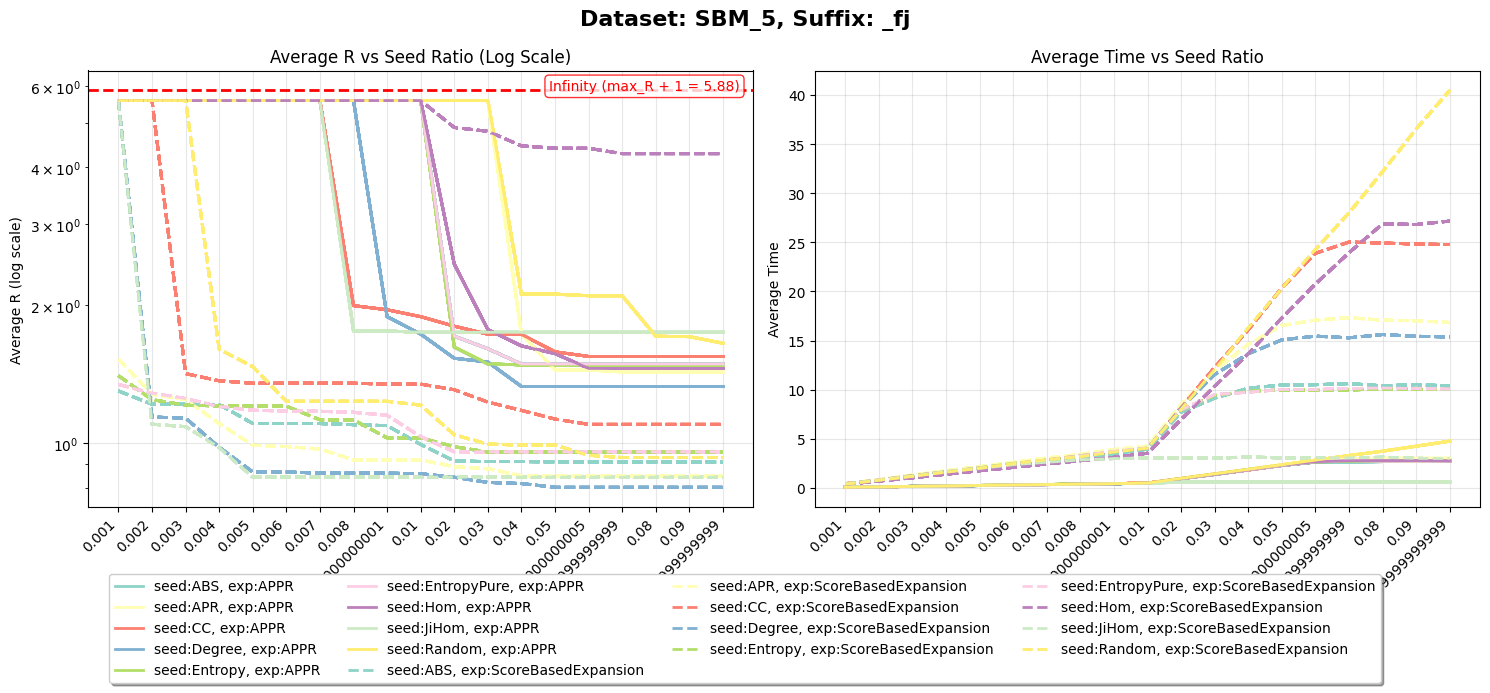

Summary for SBM_5-_fj:
  - Total groups: 342
  - Groups with infinite R: 103
  - Max finite R: 4.8795
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


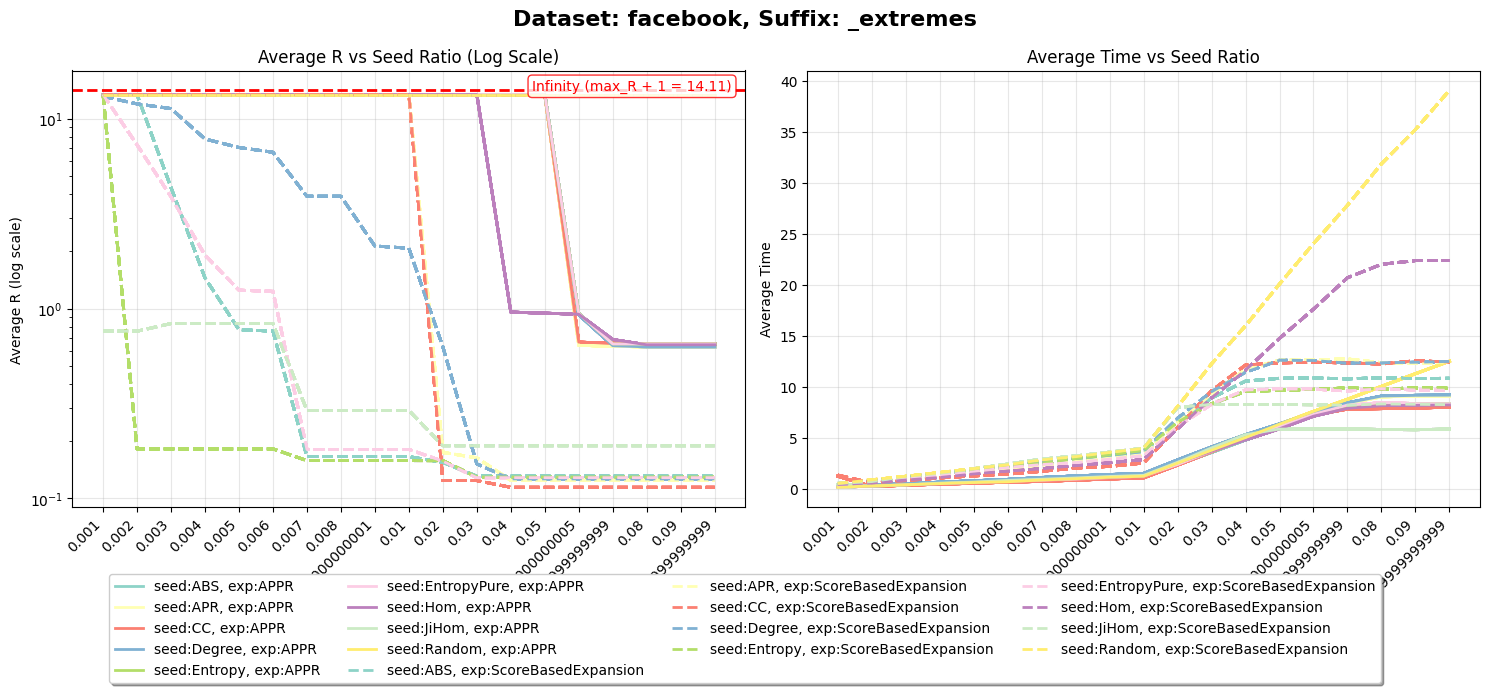

Summary for facebook-_extremes:
  - Total groups: 342
  - Groups with infinite R: 196
  - Max finite R: 13.1083
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


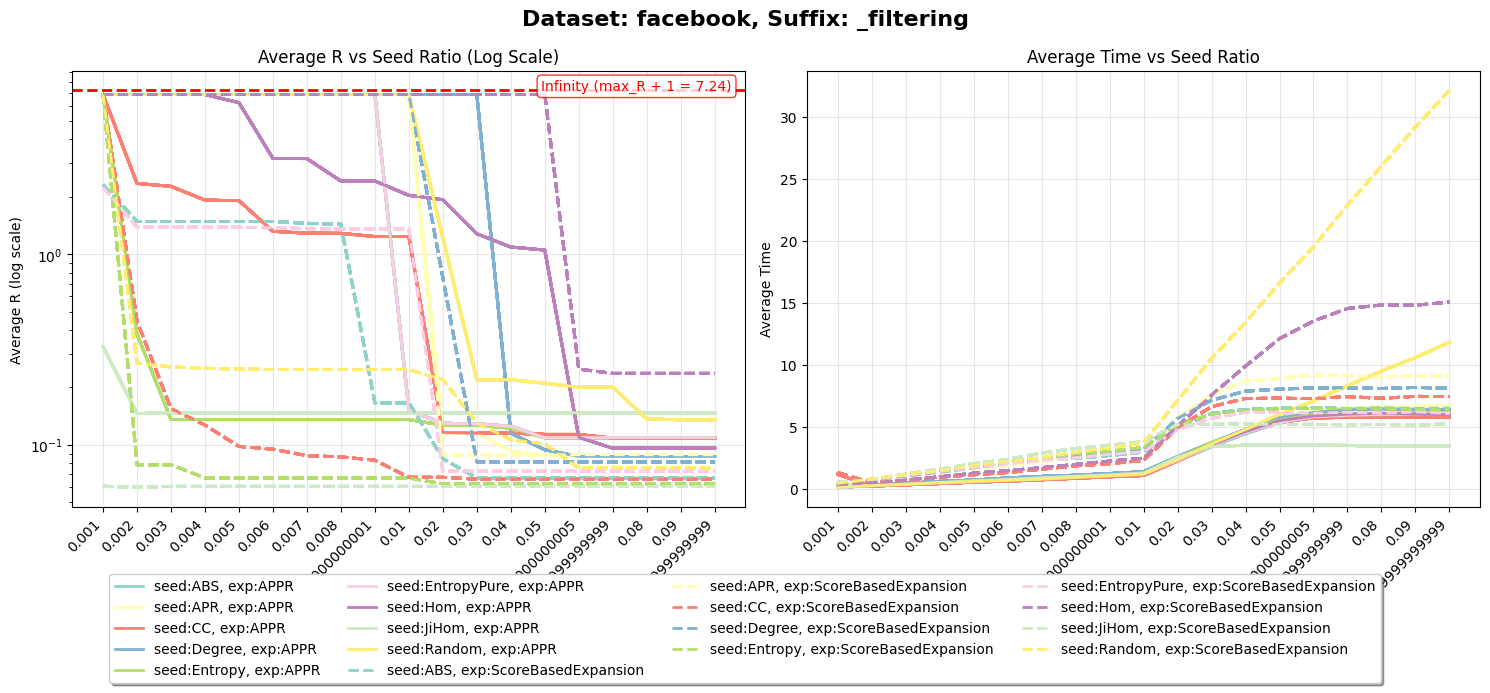

Summary for facebook-_filtering:
  - Total groups: 342
  - Groups with infinite R: 93
  - Max finite R: 6.2379
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


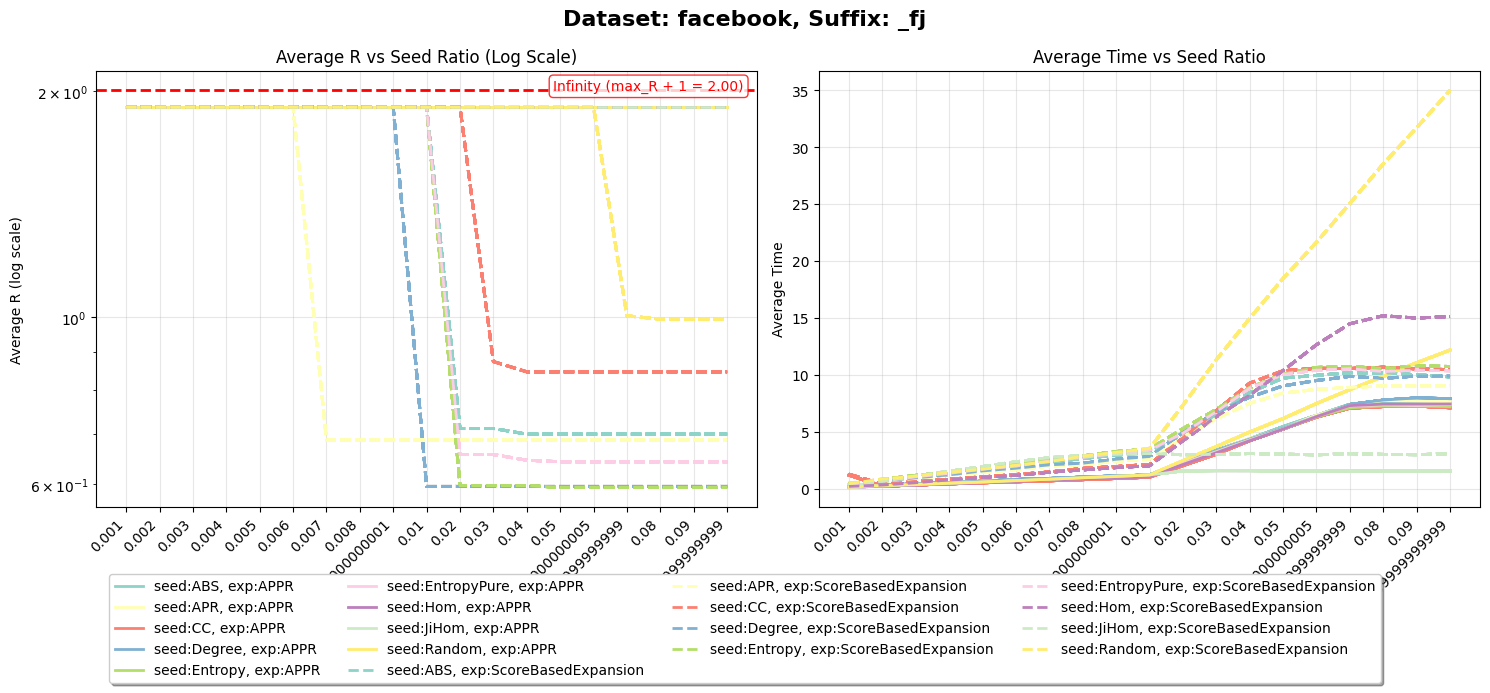

Summary for facebook-_fj:
  - Total groups: 342
  - Groups with infinite R: 280
  - Max finite R: 1.0043
  - Unique seed_ratio values: 19
  - Unique seeds: 9
  - Unique expansions: 2
--------------------------------------------------


In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Get unique dataset and suffix combinations
combinations = grouped[['dataset', 'suffix']].drop_duplicates()

# For each dataset-suffix combination, create a figure
for _, (dataset, suffix) in combinations.iterrows():
    # Filter data for this combination
    combo_data = grouped[(grouped['dataset'] == dataset) & (grouped['suffix'] == suffix)]

    if combo_data.empty:
        continue

    # Calculate max finite R value for this combination
    finite_R = combo_data[combo_data['avg_R'] != float('inf')]['avg_R']
    if len(finite_R) > 0:
        max_finite_R = finite_R.max()
        inf_line_value = max_finite_R + 1
    else:
        max_finite_R = 1
        inf_line_value = 2

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Dataset: {dataset}, Suffix: {suffix}', fontsize=16, fontweight='bold')

    # Get unique seed_ratio values and create categorical x-axis
    seed_ratios = sorted(combo_data['seed_ratio'].unique())
    x_positions = np.arange(len(seed_ratios))

    # Get unique seeds and expansions for styling
    unique_seeds = sorted(combo_data['seed'].unique())
    unique_expansions = sorted(combo_data['expansion'].unique())

    # Create color map for seeds (max 10 different colors)
    seed_colors = plt.cm.Set3(np.linspace(0, 1, min(10, len(unique_seeds))))
    seed_color_map = {seed: seed_colors[i % len(seed_colors)] for i, seed in enumerate(unique_seeds)}

    # Create line styles for expansions
    expansion_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1))]
    expansion_style_map = {exp: expansion_styles[i % len(expansion_styles)] for i, exp in enumerate(unique_expansions)}

    # Plot 1: Average R with logarithmic scale
    for _, row in combo_data.iterrows():
        expansion = row['expansion']
        seed = row['seed']
        seed_ratio = row['seed_ratio']

        # Get all data points for this expansion-seed pair
        pair_data = combo_data[(combo_data['expansion'] == expansion) &
                              (combo_data['seed'] == seed)].sort_values('seed_ratio')

        if pair_data.empty:
            continue

        # Map seed_ratio to x positions
        x_mapping = {ratio: i for i, ratio in enumerate(seed_ratios)}
        x_values = [x_mapping[ratio] for ratio in pair_data['seed_ratio']]

        # Handle infinite R values
        y_values = []
        for r in pair_data['avg_R']:
            if r == float('inf'):
                y_values.append(inf_line_value * 0.95)
            else:
                y_values.append(r)

        # Create label and style
        label = f'seed:{seed}' if len(unique_expansions) == 1 else f'seed:{seed}, exp:{expansion}'
        color = seed_color_map[seed]
        linestyle = expansion_style_map[expansion]

        ax1.plot(x_values, y_values, linestyle=linestyle, color=color,
                label=label, markersize=6, linewidth=2)

    # Add red line for infinity
    ax1.axhline(y=inf_line_value, color='red', linestyle='--', linewidth=2,
                label=f'Infinity (max_R + 1 = {inf_line_value:.2f})')

    ax1.set_xlabel('Seed Ratio')
    ax1.set_ylabel('Average R (log scale)')
    ax1.set_title('Average R vs Seed Ratio (Log Scale)')
    ax1.set_yscale('log')
    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(seed_ratios, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)

    # Plot 2: Average Time with normal scale
    for _, row in combo_data.iterrows():
        expansion = row['expansion']
        seed = row['seed']
        seed_ratio = row['seed_ratio']

        # Get all data points for this expansion-seed pair
        pair_data = combo_data[(combo_data['expansion'] == expansion) &
                              (combo_data['seed'] == seed)].sort_values('seed_ratio')

        if pair_data.empty:
            continue

        # Map seed_ratio to x positions
        x_mapping = {ratio: i for i, ratio in enumerate(seed_ratios)}
        x_values = [x_mapping[ratio] for ratio in pair_data['seed_ratio']]
        y_values = pair_data['avg_time']

        # Create label and style
        label = f'seed:{seed}' if len(unique_expansions) == 1 else f'seed:{seed}, exp:{expansion}'
        color = seed_color_map[seed]
        linestyle = expansion_style_map[expansion]

        ax2.plot(x_values, y_values, linestyle=linestyle, color=color,
                label=label, markersize=6, linewidth=2)

    ax2.set_xlabel('Seed Ratio')
    ax2.set_ylabel('Average Time')
    ax2.set_title('Average Time vs Seed Ratio')
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(seed_ratios, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    # Create a shared legend for both subplots
    handles, labels = ax1.get_legend_handles_labels()
    # Remove the infinity line from the main legend
    inf_handle = handles[-1]
    inf_label = labels[-1]
    handles = handles[:-1]
    labels = labels[:-1]

    # Remove duplicate labels from legend
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)

    # Create the main legend
    legend = fig.legend(unique_handles, unique_labels, loc='upper center',
                       bbox_to_anchor=(0.5, 0.05), ncol=min(4, len(unique_handles)),
                       frameon=True, fancybox=True, shadow=True)

    # Add infinity line annotation on the RIGHT side
    ax1.annotate(inf_label, xy=(0.98, 0.98), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8),
                ha='right', va='top', color='red')

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Make space for the legend
    plt.show()

    # Print summary for this combination
    inf_count = len(combo_data[combo_data['avg_R'] == float('inf')])
    print(f"Summary for {dataset}-{suffix}:")
    print(f"  - Total groups: {len(combo_data)}")
    print(f"  - Groups with infinite R: {inf_count}")
    print(f"  - Max finite R: {max_finite_R if len(finite_R) > 0 else 'N/A'}")
    print(f"  - Unique seed_ratio values: {len(seed_ratios)}")
    print(f"  - Unique seeds: {len(unique_seeds)}")
    print(f"  - Unique expansions: {len(unique_expansions)}")
    print("-" * 50)

# main

In [ ]:
matching_files_names = [f for f in os.listdir('.')
                 if os.path.isfile(f) and 'baseline' not in f]

df = None
for file_name in matching_files_names:
    print(file_name)
    with open(file_name, "rb") as file:
        data = pickle.load(file)

    if('our'==list(data.keys())[0][-1]):
        x = df_of_our_models(data)
    else:
        print("zzzzz")


        x = df_of_GAE(data)

    if df is not None:
        df = pd.concat([df, x.copy()], ignore_index=True)
    else:
        df = x.copy()

df = df.drop('EC', axis=1)
df = df.drop_duplicates(subset=df.columns)

EchoGAE_results_2025-11-08_17-23-54.pkl
zzzzz
EchoGAE_basedModel.py


UnpicklingError: could not find MARK

In [ ]:
df

,experiment,dataset,suffix,model,expansion,seed,EC,V_S,Delta_E,R,lenEC,time
0,0,facebook,_fj,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,5.58
1,0,facebook,_filtering,EchoGAE,-1,-1,"[2663, 2664, 2666, 2669, 2673, 2676, 2679, 268...",0.03757,0.32271,0.02625,226,6.17
2,0,facebook,_extremes,EchoGAE,-1,-1,"[594, 3980, 3981, 3982, 3983, 3984, 3985, 3986...",0.03981,0.37925,0.00976,60,6.00
3,1,facebook,_fj,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,5.95
4,1,facebook,_filtering,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,6.05
5,1,facebook,_extremes,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,5.74
6,2,facebook,_fj,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,6.31
7,2,facebook,_filtering,EchoGAE,-1,-1,"[2663, 2664, 2666, 2669, 2673, 2676, 2679, 268...",0.02875,0.32374,0.02625,226,5.89
8,2,facebook,_extremes,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,6.03
9,3,facebook,_fj,EchoGAE,-1,-1,[],-1.00000,-1.00000,inf,-1,5.85


In [ ]:
def print_unique_values(df, columns):

    for col in columns:
        if col in df.columns:
            print(f"\nColumn: {col}")
            print(df[col].value_counts())
        else:
            print(f"\nColumn '{col}' not found in DataFrame.")


print_unique_values(df,["experiment","dataset","suffix","model","expansion","seed"])


Column: experiment
experiment
0    21
1    21
2    21
3    21
4    21
5    21
6    21
7    21
8    21
9    21
Name: count, dtype: int64

Column: dataset
dataset
SBM_5       60
SBM_10      60
facebook    30
lastfm      30
git         30
Name: count, dtype: int64

Column: suffix
suffix
_fj           70
_filtering    70
_extremes     70
Name: count, dtype: int64

Column: model
model
EchoGAE    210
Name: count, dtype: int64

Column: expansion
expansion
-1    210
Name: count, dtype: int64

Column: seed
seed
-1    210
Name: count, dtype: int64


In [ ]:
# print(df.loc[df["experiment"] == 0, [ "dataset", "suffix", "model", "expansion", "seed"]])
# df[(df["experiment"] == 0) & (df["model"] == "our")]
# df[(df["experiment"] == 0) & (df["model"] == "EchoGAE")]

In [ ]:
merged = pd.merge(
    df,
    base_df[['dataset', 'suffix', 'experiment', 'R']],  # Select only necessary columns
    on=['dataset', 'suffix', 'experiment'],
    suffixes=('_main', '_base')
)

# Convert time to float first
merged['time'] = pd.to_numeric(merged['time'], errors='coerce')

merged['R_final'] = merged[['R_main', 'R_base']].min(axis=1)

merged['main_better'] = merged['R_main'] <= merged['R_base']
merged['base_better'] = merged['R_base'] < merged['R_main']

merged['R_main_inf'] = np.isinf(merged['R_main'])
merged['R_final_inf'] = np.isinf(merged['R_final'])

grouped = (
    merged.groupby(['dataset', 'suffix', 'model', 'expansion', 'seed'], as_index=False)
    .agg(
        avg_R_final=('R_final', 'mean'),
        avg_time=('time', 'mean'),  # Only added average time
        count_main_better=('main_better', 'sum'),
        count_base_better=('base_better', 'sum'),
        count_R_main_inf=('R_main_inf', 'sum'),
        count_R_final_inf=('R_final_inf', 'sum'),
    )
)

grouped

,dataset,suffix,model,expansion,seed,avg_R_final,avg_time,count_main_better,count_base_better,count_R_main_inf,count_R_final_inf
0,SBM_10,_extremes,EchoGAE,-1,-1,0.968620,33.379,7,3,3,0
1,SBM_10,_filtering,EchoGAE,-1,-1,0.487660,32.957,9,1,1,0
2,SBM_10,_fj,EchoGAE,-1,-1,2.200000,34.337,0,10,10,0
3,SBM_5,_extremes,EchoGAE,-1,-1,0.657929,10.038,5,5,5,0
4,SBM_5,_filtering,EchoGAE,-1,-1,0.476953,9.728,8,2,2,0
5,SBM_5,_fj,EchoGAE,-1,-1,1.000000,9.663,0,10,10,0


# extra- ignore it


In [ ]:
from math import inf

In [ ]:
x = {(0, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1111.55'},
(0, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.35658, 'LenEC': 277, 'V_S': 0.04287, 'Delta_E': 0.31332, 'time': '1206.40'},
(0, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.38748, 'LenEC': 258, 'V_S': 0.04112, 'Delta_E': 0.4137, 'time': '1102.30'},
(1, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1196.99'},
(1, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.40766, 'LenEC': 243, 'V_S': 0.0288, 'Delta_E': 0.35903, 'time': '1194.45'},
(1, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.40766, 'LenEC': 243, 'V_S': 0.02404, 'Delta_E': 0.33111, 'time': '1188.70'},
(2, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1132.37'},
(2, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.34768, 'LenEC': 275, 'V_S': 0.04838, 'Delta_E': 0.33735, 'time': '978.88'},
(2, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.36816, 'LenEC': 258, 'V_S': 0.0314, 'Delta_E': 0.30254, 'time': '893.71'},
(3, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '910.65'},
(3, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.37198, 'LenEC': 259, 'V_S': 0.03621, 'Delta_E': 0.31225, 'time': '1022.73'},
(3, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.34371, 'LenEC': 294, 'V_S': 0.03048, 'Delta_E': 0.31034, 'time': '1095.40'},
(4, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1086.74'},
(4, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.3998, 'LenEC': 240, 'V_S': 0.04895, 'Delta_E': 0.30358, 'time': '1095.60'},
(4, 'SBM_50', '_extremes', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1094.36'},
(5, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1067.16'},
(5, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.28882, 'LenEC': 351, 'V_S': 0.03522, 'Delta_E': 0.33868, 'time': '1131.39'},
(5, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.45061, 'LenEC': 220, 'V_S': 0.01881, 'Delta_E': 0.33121, 'time': '1163.13'},
(6, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1144.31'},
(6, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.27356, 'LenEC': 352, 'V_S': 0.02879, 'Delta_E': 0.34161, 'time': '1036.75'},
(6, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.36988, 'LenEC': 266, 'V_S': 0.02529, 'Delta_E': 0.30751, 'time': '1063.86'},
(7, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1078.14'},
(7, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.41857, 'LenEC': 238, 'V_S': 0.03387, 'Delta_E': 0.33362, 'time': '1035.85'},
(7, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.41857, 'LenEC': 238, 'V_S': 0.02064, 'Delta_E': 0.30646, 'time': '1032.91'},
(8, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1039.89'},
(8, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.35301, 'LenEC': 271, 'V_S': 0.03668, 'Delta_E': 0.34257, 'time': '1048.17'},
(8, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.45944, 'LenEC': 206, 'V_S': 0.03131, 'Delta_E': 0.3028, 'time': '952.45'},
(9, 'SBM_50', '_fj', 'EchoGAE') : {'R': inf, 'V_S': -1, 'Delta_E': -1, 'time': '1073.93'},
(9, 'SBM_50', '_filtering', 'EchoGAE') : {'R': 0.33133, 'LenEC': 285, 'V_S': 0.03591, 'Delta_E': 0.30385, 'time': '1067.37'},
(9, 'SBM_50', '_extremes', 'EchoGAE') : {'R': 0.48911, 'LenEC': 192, 'V_S': 0.01808, 'Delta_E': 0.34012, 'time': '1078.01'}}

In [ ]:
rows = []
for key,val in x.items():
    experiment = key[0]
    suffix = key[2]
    if val['R'] == inf:
        R = inf
    else:
        R = round(val['R'],3)
    time = round(float(val['time']))
    rows.append([experiment,'SBM_50',suffix,R,time])

In [ ]:
columns = ['experiment','dataset', 'suffix', 'R', 'time']
df = pd.DataFrame(rows, columns=columns)


In [ ]:
df

,experiment,dataset,suffix,R,time
0,0,SBM_50,_fj,inf,1112
1,0,SBM_50,_filtering,0.357,1206
2,0,SBM_50,_extremes,0.387,1102
3,1,SBM_50,_fj,inf,1197
4,1,SBM_50,_filtering,0.408,1194
5,1,SBM_50,_extremes,0.408,1189
6,2,SBM_50,_fj,inf,1132
7,2,SBM_50,_filtering,0.348,979
8,2,SBM_50,_extremes,0.368,894
9,3,SBM_50,_fj,inf,911


In [ ]:
merged = pd.merge(
    df,
    base_df[['dataset', 'suffix', 'experiment', 'R']],  # Select only necessary columns
    on=['dataset', 'suffix', 'experiment'],
    suffixes=('_main', '_base')
)

# Convert time to float first
merged['time'] = pd.to_numeric(merged['time'], errors='coerce')

merged['R_final'] = merged[['R_main', 'R_base']].min(axis=1)

merged['main_better'] = merged['R_main'] <= merged['R_base']
merged['base_better'] = merged['R_base'] < merged['R_main']

merged['R_main_inf'] = np.isinf(merged['R_main'])
merged['R_final_inf'] = np.isinf(merged['R_final'])

grouped = (
    merged.groupby(['dataset', 'suffix'], as_index=False)
    .agg(
        avg_R_final=('R_final', 'mean'),
        avg_time=('time', 'mean'),  # Only added average time
        count_main_better=('main_better', 'sum'),
        count_base_better=('base_better', 'sum'),
        count_R_main_inf=('R_main_inf', 'sum'),
        count_R_final_inf=('R_final_inf', 'sum'),
    )
)

grouped

,dataset,suffix,avg_R_final,avg_time,count_main_better,count_base_better,count_R_main_inf,count_R_final_inf
0,SBM_50,_extremes,2.4695,1066.4,9,1,1,0
1,SBM_50,_filtering,0.3551,1081.7,10,0,0,0
2,SBM_50,_fj,17.4000,1084.2,0,10,10,0
